Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Reading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project File/WaterQualityPrediction.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


Checking for any missing value

In [ ]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Checking data types

In [ ]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

Checking unique values of the target variable

In [ ]:
df['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

Counting occurrences of each class in the target variable

In [ ]:
df['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

Replacing into NaN

In [ ]:
df['is_safe']=df['is_safe'].str.replace('#NUM!',"NaN")

Encoding

In [ ]:
le=LabelEncoder()
df['is_safe']=le.fit_transform(df['is_safe'])
df['ammonia']=le.fit_transform(df['ammonia'])
df['ammonia'] = df['ammonia'].astype(float)

Checking again data types


In [ ]:
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

Checking values of target variables

In [ ]:
df['is_safe'].unique()

array([1, 0, 2])

Replacing 2 with Nan

In [ ]:
df.loc[df['is_safe'] == 2, 'is_safe'] = pd.NA

Checking unique value

In [ ]:
df['is_safe'].unique()

array([ 1.,  0., nan])

Checking missing value

In [ ]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

Filling missing value

In [ ]:
df['is_safe']=df['is_safe'].fillna(df['is_safe'].mode()[0])

In [ ]:
df['is_safe'].value_counts()

is_safe
0.0    7087
1.0     912
Name: count, dtype: int64

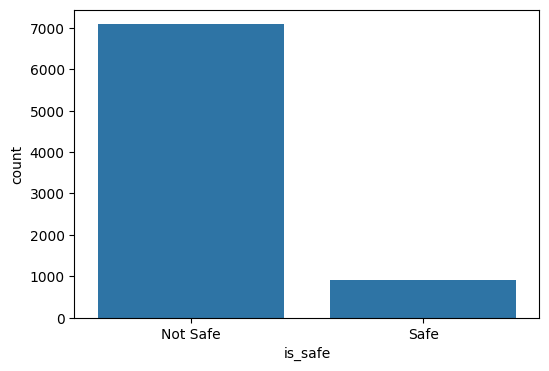

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = "is_safe",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Safe", "Safe"])
plt.show()

In [ ]:
fig =  px.pie (df, names = "is_safe", hole = 0.4, template = "plotly_dark")
fig.show ()

<Axes: >

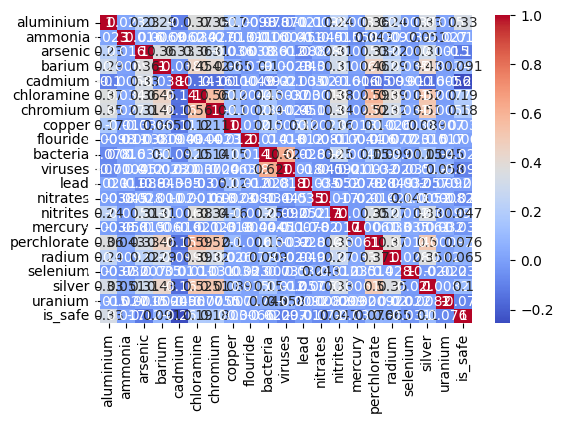

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

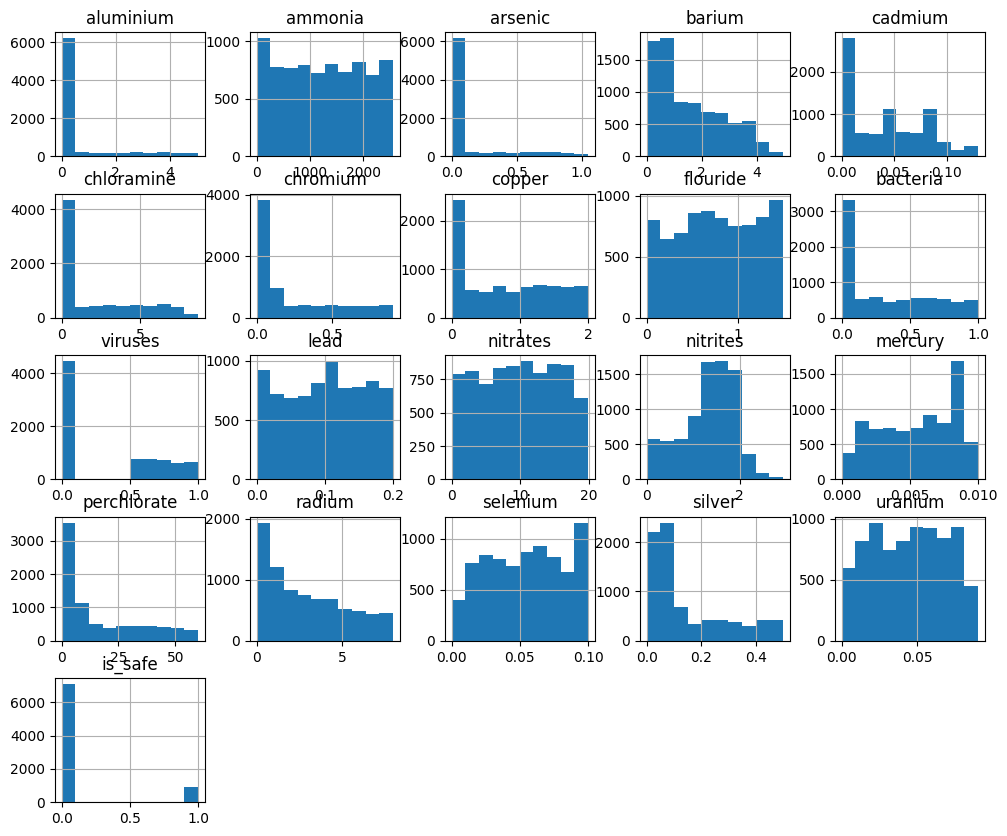

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]
df.hist()
plt.show()

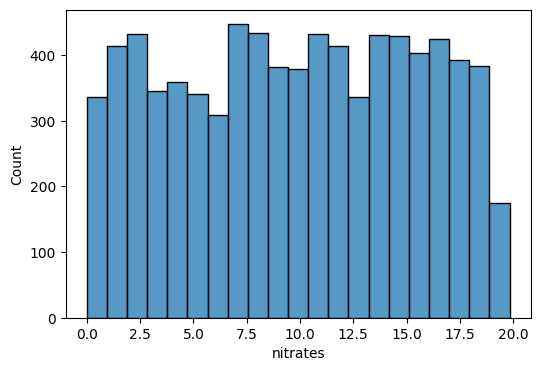

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(x="nitrates", data=df)
plt.show()

In [ ]:
fig = px.box(df, x="is_safe", y="lead", color="is_safe", width=800, height=400)
fig.show()

In [ ]:
plt.figure(figsize=(6,4))
fig = px.scatter (df, x = "aluminium", y = "nitrates", color = "is_safe", template = "plotly_dark",  trendline="ols",width=500, height=500)
fig.show ()

<Figure size 600x400 with 0 Axes>

Again checking missing value

In [ ]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Displaying

In [ ]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,2476.0,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,1222.0,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,526.0,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,307.0,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,1511.0,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,2362.0,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,1500.0,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,2285.0,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,194.0,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


Input feature

In [ ]:
X=df.iloc[:,:-1]
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,2476.0,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,1222.0,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,526.0,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,307.0,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,1511.0,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,2362.0,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,1500.0,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,2285.0,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,194.0,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


Target variable

In [ ]:
y=df.iloc[:,-1]
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
7994    1.0
7995    1.0
7996    1.0
7997    1.0
7998    1.0
Name: is_safe, Length: 7999, dtype: float64

Using Scaler

In [ ]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)
X_scaled

array([[0.32673267, 0.9660554 , 0.03809524, ..., 0.8       , 0.68      ,
        0.22222222],
       [0.45940594, 0.47678502, 0.00952381, ..., 0.8       , 0.54      ,
        0.55555556],
       [0.2       , 0.20522825, 0.03809524, ..., 0.7       , 0.88      ,
        0.11111111],
       ...,
       [0.01782178, 0.89153336, 0.        , ..., 0.        , 0.08      ,
        0.55555556],
       [0.0019802 , 0.07569255, 0.00952381, ..., 0.        , 0.        ,
        0.        ],
       [0.00792079, 0.89153336, 0.00952381, ..., 0.        , 0.08      ,
        0.55555556]])

Training and testing sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)

Defining classifiers

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
xgb=XGBClassifier()
abc=AdaBoostClassifier()
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
nbs=GaussianNB()
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)
models=[knn,sv,xgb,abc,rfc,nbs,clf]
models1=[]
accuracies = []
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) * 100
  accuracies.append(accuracy)
  models1.append(model.__class__.__name__)
  print(classification_report(y_test,y_pred))
  print(accuracy_score(y_test,y_pred)*100)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2136
         1.0       0.50      0.31      0.38       264

    accuracy                           0.89      2400
   macro avg       0.71      0.63      0.66      2400
weighted avg       0.87      0.89      0.88      2400

88.95833333333333
SVC()
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2136
         1.0       0.82      0.42      0.56       264

    accuracy                           0.93      2400
   macro avg       0.88      0.71      0.76      2400
weighted avg       0.92      0.93      0.92      2400

92.66666666666666
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_ty

Models bar plot

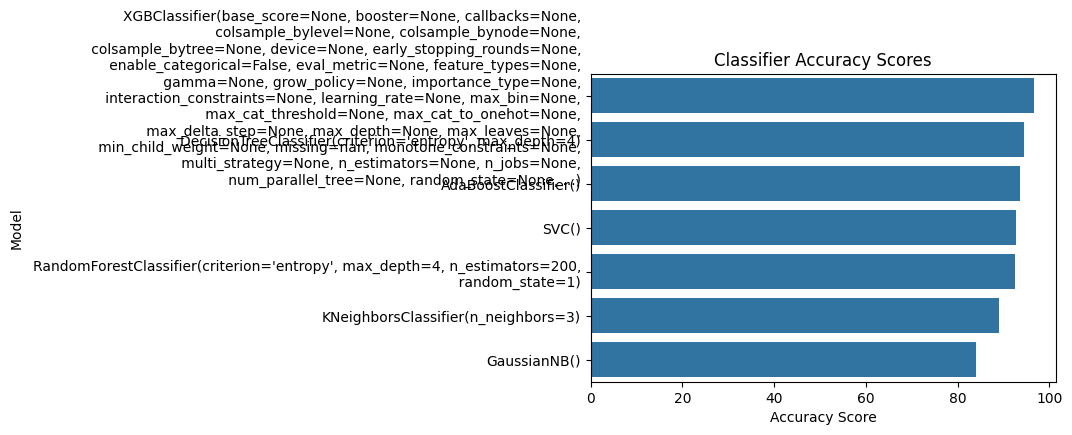

In [ ]:
models_df = pd.DataFrame({
    'Model': models,
    'Accuracy_score': accuracies
})
models_df = models_df.sort_values(by='Accuracy_score', ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x='Accuracy_score', y='Model', data=models_df)
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Classifier Accuracy Scores')
plt.show()

Target variable's value count

In [ ]:
y.value_counts()

is_safe
0.0    7087
1.0     912
Name: count, dtype: int64

Over-sampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

Scaler

In [ ]:
mms=MinMaxScaler()
X_scaled_os=mms.fit_transform(X_os)
X_scaled_os

array([[0.32673267, 0.9660554 , 0.03809524, ..., 0.8       , 0.68      ,
        0.22222222],
       [0.45940594, 0.47678502, 0.00952381, ..., 0.8       , 0.54      ,
        0.55555556],
       [0.2       , 0.20522825, 0.03809524, ..., 0.7       , 0.88      ,
        0.11111111],
       ...,
       [0.01235248, 0.10431825, 0.15660969, ..., 0.61243335, 0.06248667,
        0.52792588],
       [0.02297777, 0.01862845, 0.00773533, ..., 0.        , 0.06      ,
        0.22222222],
       [0.15102085, 0.00208499, 0.20145897, ..., 0.29744681, 0.33324255,
        0.37437352]])

Training and testing set

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_scaled_os,y_os,random_state=1,test_size=0.3)

Defining classifiers of over sampling

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
xgb=XGBClassifier()
abc=AdaBoostClassifier()
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
nbs=GaussianNB()
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)
models=[knn,sv,xgb,abc,rfc,nbs,clf]
for model in models:
  print(model)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print(accuracy_score(y_test_os,y_pred_os)*100)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85      2088
         1.0       0.81      0.99      0.89      2165

    accuracy                           0.87      4253
   macro avg       0.90      0.87      0.87      4253
weighted avg       0.90      0.87      0.87      4253

87.44415706560075
SVC()
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      2088
         1.0       0.94      0.97      0.95      2165

    accuracy                           0.95      4253
   macro avg       0.95      0.95      0.95      4253
weighted avg       0.95      0.95      0.95      4253

95.29743710322126
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_ty

Under-sampling

In [ ]:
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

Scaling

In [ ]:
mms=MinMaxScaler()
X_us_scaled=mms.fit_transform(X_us)
X_us_scaled

array([[0.002     , 0.62397501, 0.05825243, ..., 0.5       , 0.12      ,
        0.88888889],
       [0.008     , 0.32135884, 0.02912621, ..., 0.5       , 0.1       ,
        0.66666667],
       [0.34      , 0.82584928, 0.39805825, ..., 0.5       , 0.9       ,
        0.22222222],
       ...,
       [0.018     , 0.8922296 , 0.        , ..., 0.        , 0.08      ,
        0.55555556],
       [0.002     , 0.07575166, 0.00970874, ..., 0.        , 0.        ,
        0.        ],
       [0.008     , 0.8922296 , 0.00970874, ..., 0.        , 0.08      ,
        0.55555556]])

Training and testing

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us_scaled,y_us,random_state=1,test_size=0.3)

Defining classifiers of under sampling

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
xgb=XGBClassifier()
abc=AdaBoostClassifier()
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
nbs=GaussianNB()
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)
models=[knn,sv,xgb,abc,rfc,nbs,clf]
for model in models:
  print(model)
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print(accuracy_score(y_test_us,y_pred_us)*100)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79       272
         1.0       0.76      0.91      0.83       276

    accuracy                           0.81       548
   macro avg       0.83      0.81      0.81       548
weighted avg       0.82      0.81      0.81       548

81.2043795620438
SVC()
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       272
         1.0       0.82      0.89      0.85       276

    accuracy                           0.85       548
   macro avg       0.85      0.85      0.85       548
weighted avg       0.85      0.85      0.85       548

84.67153284671532
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_typ

XGB classifier over sampling-best model

In [ ]:
os=SMOTE(random_state=1)
X_os_xgb,y_os_xgb=os.fit_resample(X,y)

In [ ]:
mms=MinMaxScaler()
X_scaled_os_xgb=mms.fit_transform(X_os_xgb)
X_scaled_os_xgb

array([[0.32673267, 0.9660554 , 0.03809524, ..., 0.8       , 0.68      ,
        0.22222222],
       [0.45940594, 0.47678502, 0.00952381, ..., 0.8       , 0.54      ,
        0.55555556],
       [0.2       , 0.20522825, 0.03809524, ..., 0.7       , 0.88      ,
        0.11111111],
       ...,
       [0.01235248, 0.10431825, 0.15660969, ..., 0.61243335, 0.06248667,
        0.52792588],
       [0.02297777, 0.01862845, 0.00773533, ..., 0.        , 0.06      ,
        0.22222222],
       [0.15102085, 0.00208499, 0.20145897, ..., 0.29744681, 0.33324255,
        0.37437352]])

In [ ]:
X_train_os_xgb,X_test_os_xgb,y_train_os_xgb,y_test_os_xgb=train_test_split(X_scaled_os_xgb,y_os_xgb,random_state=1,test_size=0.3)

In [ ]:
xgb_main=XGBClassifier()
xgb_main.fit(X_train_os_xgb,y_train_os_xgb)
y_pred_os_xgb=xgb_main.predict(X_test_os_xgb)
print(classification_report(y_test_os_xgb,y_pred_os_xgb))
print(accuracy_score(y_test_os_xgb,y_pred_os_xgb)*100)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2088
         1.0       0.98      0.99      0.98      2165

    accuracy                           0.98      4253
   macro avg       0.98      0.98      0.98      4253
weighted avg       0.98      0.98      0.98      4253

98.09546202680461


Deploy in python

In [ ]:
import pickle
filename='water.sav'
pickle.dump(xgb_main,open('water.sav','wb'))
pickle.dump(mms,open('scalerwater.sav','wb'))